# Assign

In [27]:
import pandas as pd
mappingPath = "stockid2name.csv"
id2name= pd.read_csv(mappingPath, sep = '\t')
id2name = {tup[1]:tup[2] for tup in id2name.itertuples() }

In [28]:
id2name

{'sz000001': '平安银行',
 'sz000002': '万科A',
 'sz000004': '国农科技',
 'sz000005': '世纪星源',
 'sz000006': '深振业A',
 'sz000007': '全新好',
 'sz000008': '神州高铁',
 'sz000009': '中国宝安',
 'sz000010': '美丽生态',
 'sz000011': '深物业A',
 'sz000012': '南玻A',
 'sz000014': '沙河股份',
 'sz000016': '深康佳A',
 'sz000017': '*ST中华A',
 'sz000019': '深粮控股',
 'sz000020': '深华发A',
 'sz000021': '深科技',
 'sz000023': '深天地A',
 'sz000025': '特力A',
 'sz000026': '飞亚达',
 'sz000027': '深圳能源',
 'sz000028': '国药一致',
 'sz000029': '深深房A',
 'sz000030': '富奥股份',
 'sz000031': '大悦城',
 'sz000032': '深桑达A',
 'sz000034': '神州数码',
 'sz000035': '中国天楹',
 'sz000036': '华联控股',
 'sz000037': '深南电A',
 'sz000038': '深大通',
 'sz000039': '中集集团',
 'sz000040': '东旭蓝天',
 'sz000042': '中洲控股',
 'sz000045': '深纺织A',
 'sz000046': '泛海控股',
 'sz000048': '京基智农',
 'sz000049': '德赛电池',
 'sz000050': '深天马A',
 'sz000055': '方大集团',
 'sz000056': '皇庭国际',
 'sz000058': '深赛格',
 'sz000059': '华锦股份',
 'sz000060': '中金岭南',
 'sz000061': '农产品',
 'sz000062': '深圳华强',
 'sz000063': '中兴通讯',
 'sz000065': '北方国际',


'sz000001'

In [31]:
for i in id2name.keys():
    j = i
    break

In [32]:
j

'sz000001'

In [54]:
# This script is for data preprocessing
import pandas as pd
import os 
import datetime

def createDir(mappingPath, outputPath):
    # create the directories (always overwrite)
    # outputPath: "stockNews/"
    # first we get the mapping from id to name
    id2name= pd.read_csv(mappingPath, sep = '\t')
    id2name = {tup[1]:tup[2] for tup in id2name.itertuples()}
    
    os.mkdir(outputPath)
    
    for stockid in id2name.keys():
        os.makedirs(outputPath + "/{}".format(stockid))
    
    
def assignNews(newsPath, mappingPath, outputPath):
    # TODO: assign news from newsPath to certain stock and output to the outputPath
    # outputPath
    #   - stock1
    #     - 2020-01-01
    #        - news1
    #        - news2
    #     - 2020-01-02

    # first we get the mapping from id to name
    id2name= pd.read_csv(mappingPath, sep = '\t')
    id2name = {tup[1]:tup[2] for tup in id2name.itertuples()}
    
    stockNewsCount = {}
    
    for id_ in id2name.keys(): # 4000+ stocks
        for csvFile in os.listdir(newsPath): # 600 days of news file
            # csvFile: sina-2020-10-10.csv
            if csvFile[-3:] != 'csv':
                continue;
            date = csvFile[5:-4] # 2020-10-10
            
            # open file
            
            print(f"Scanning file {csvFile}...")
            # newsFile = pd.read_csv(dataPath + '/generalNews/general-2019-01-01.csv', sep = '\t')
            newsFile = pd.read_csv(newsPath + csvFile, sep = '\t')
            for tup in newsFile.itertuples(): # about 60 news for one file 
                # at worst 4000*600*60*4 = 57e find operators
                title = tup[0]
                content = tup[1].strip().replace(u'\u3000', u' ').replace(u'\xa0', u' ').replace('\n', ' ')
                if id_ in title or id2name[id_] in title or id_ in content or id2name[id_] in content:
                    f = open(outputPath + f'/{id_}/{date}.csv', 'a+')
                    f.write(title + '\t' + content + '\n')
                    f.close()
                    
                    stockNewsCount[id_] = stockNewsCount.get(id_, 0) + 1 # maintain the count of news for each stock
                    
                
            
    
    
    
        

    pass


def assessNews(newsPath):
    # TODO: Calculate news count for each stock files
    # TODO: Discard stocks with no or few news or news in a not really continuous range
    # TODO: Find a way to assess the content of the news
    pass

def splitWords(newsPath):
    # TODO: Use jieba to split words and remove stopwords iteratively for each news file
    pass

def getLabel(dailyPath):
    # TODO: Perform a diff operation on the daily close price of all stocks and output label file
    pass

def buildData(dataPath):
    # TODO: Find a way to organize the data for the convinience in future data loader
    pass

def dataPreprocess(dataPath,  # input path
                   mappingPath,  # stockid to name mapping path
                   outputPath,  # output path
                   dailyPath    # daily info path
                   ):
    # the input path has the structure like this
    # dataPath
    #   - sinaNews
    #      - sina-yyyy-mm-dd.csv
    #   - wsNews
    #      - ws-yyyy-mm-dd.csv
    #   - thsNews
    #      - ths-yyyy-mm-dd.csv
    #   - ycjNews
    #      - ycj-yyyy-mm-dd.csv
    #   - eastmoneyNews
    #      - eastmoney-yyyy-mm-dd.csv
    #   - generalNews
    #      - yyyy-mm-dd.csv
    #   - daily_basic (some features about stocks)
    #      - <stock_id>.csv
    #   - daily (some features about stocks)
    #      - <stock_id>.csv
    
    # First we create directories
    createDir(mappingPath, outputPath)
    
    # Assign news to different stocks
    
    assignNews(newsPath=dataPath + '/generalNews',
               mappingPath=mappingPath,
               outputPath=outputPath)

    # In output path, stockid <== date <== news

    # Assess the news and drop useless stocks
    assessNews(newsPath=outputPath)

    # Split words, remove stop words
    splitWords(newsPath=outputPath)

    # Get label data
    getLabel(dailyPath=dailyPath)

    # Organize the data with the label
    buildData(dataPath=outputPath)

    
def main():
    outputPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare/stockNews'
    mappingPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare/stockid2name.csv'
    createDir(mappingPath, outputPath)
    
    dataPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'
    
    
    pass



In [55]:
main()

In [158]:
dataPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'
newsPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare/generalNews'
outputPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare/stockNews'
mappingPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare/stockid2name.csv'

id2name= pd.read_csv(mappingPath, sep = '\t')
id2name = {tup[1]:tup[2] for tup in id2name.itertuples()}

newsFile = [dataPath + '/generalNews/' + csvFile for csvFile in os.listdir(dataPath + '/generalNews')] + \
            [dataPath + '/sinaNews/' + csvFile for csvFile in os.listdir(dataPath + '/sinaNews')] + \
            [dataPath + '/thsNews/' + csvFile for csvFile in os.listdir(dataPath + '/thsNews')] + \
            [dataPath + '/eastmoneyNews/' + csvFile for csvFile in os.listdir(dataPath + '/eastmoneyNews')] + \
            [dataPath + '/ycjNews/' + csvFile for csvFile in os.listdir(dataPath + '/ycjNews')] + \
            [dataPath + '/wsNews/' + csvFile for csvFile in os.listdir(dataPath + '/wsNews')] 

stockNewsCount = {} # count how many news on a certain date for a certain stock
id_ = 'sz000001'

i = 1
stockNewsDateCount = {}
for csvFile in newsFile: # 600 days of news file
    # csvFile: sina-2020-10-10.csv
    
    
    if csvFile[-3:] != 'csv':
        continue;
    date = csvFile[-14:-4] # 2020-10-10

    # open file

    print(f"Scanning file {i}...")
    i = i + 1
    newsFile = pd.read_csv(csvFile, sep = '\t')
    for tup in newsFile.itertuples(): # about 60 news for one file 
        # at worst 4000*600*60*4 = 57e find operators
        title = tup[1]
        content = tup[2]
        if pd.isna(content):
            continue
        # print(title, content)
        content = content.strip().replace(u'\u3000', u' ').replace(u'\xa0', u' ').replace('\n', ' ')
        if id_ in title or id_[2:] in title or id2name[id_] in title or id_ in content or id_[2:] in content or id2name[id_] in content:
            f = open(outputPath + f'/{id_}/{date}.csv', 'a+')
            f.write(title + '\t' + content + '\n')
            f.close()

            stockNewsDateCount[date] = stockNewsDateCount.get(date, 0) + 1 # maintain the count of news for each stock

stockNewsCount[id_] = stockNewsDateCount
time_end=time.time()
print('time cost',time_end-time_start,'s')

Scanning file 1...
Scanning file 2...
Scanning file 3...
Scanning file 4...
Scanning file 5...
Scanning file 6...
Scanning file 7...
Scanning file 8...
Scanning file 9...
Scanning file 10...
Scanning file 11...
Scanning file 12...
Scanning file 13...
Scanning file 14...
Scanning file 15...
Scanning file 16...
Scanning file 17...
Scanning file 18...
Scanning file 19...
Scanning file 20...
Scanning file 21...
Scanning file 22...
Scanning file 23...
Scanning file 24...
Scanning file 25...
Scanning file 26...
Scanning file 27...
Scanning file 28...
Scanning file 29...
Scanning file 30...
Scanning file 31...
Scanning file 32...
Scanning file 33...
Scanning file 34...
Scanning file 35...
Scanning file 36...
Scanning file 37...
Scanning file 38...
Scanning file 39...
Scanning file 40...
Scanning file 41...
Scanning file 42...
Scanning file 43...
Scanning file 44...
Scanning file 45...
Scanning file 46...
Scanning file 47...
Scanning file 48...
Scanning file 49...
Scanning file 50...
Scanning 

Scanning file 406...
Scanning file 407...
Scanning file 408...
Scanning file 409...
Scanning file 410...
Scanning file 411...
Scanning file 412...
Scanning file 413...
Scanning file 414...
Scanning file 415...
Scanning file 416...
Scanning file 417...
Scanning file 418...
Scanning file 419...
Scanning file 420...
Scanning file 421...
Scanning file 422...
Scanning file 423...
Scanning file 424...
Scanning file 425...
Scanning file 426...
Scanning file 427...
Scanning file 428...
Scanning file 429...
Scanning file 430...
Scanning file 431...
Scanning file 432...
Scanning file 433...
Scanning file 434...
Scanning file 435...
Scanning file 436...
Scanning file 437...
Scanning file 438...
Scanning file 439...
Scanning file 440...
Scanning file 441...
Scanning file 442...
Scanning file 443...
Scanning file 444...
Scanning file 445...
Scanning file 446...
Scanning file 447...
Scanning file 448...
Scanning file 449...
Scanning file 450...
Scanning file 451...
Scanning file 452...
Scanning file

Scanning file 816...
Scanning file 817...
Scanning file 818...
Scanning file 819...
Scanning file 820...
Scanning file 821...
Scanning file 822...
Scanning file 823...
Scanning file 824...
Scanning file 825...
Scanning file 826...
Scanning file 827...
Scanning file 828...
Scanning file 829...
Scanning file 830...
Scanning file 831...
Scanning file 832...
Scanning file 833...
Scanning file 834...
Scanning file 835...
Scanning file 836...
Scanning file 837...
Scanning file 838...
Scanning file 839...
Scanning file 840...
Scanning file 841...
Scanning file 842...
Scanning file 843...
Scanning file 844...
Scanning file 845...
Scanning file 846...
Scanning file 847...
Scanning file 848...
Scanning file 849...
Scanning file 850...
Scanning file 851...
Scanning file 852...
Scanning file 853...
Scanning file 854...
Scanning file 855...
Scanning file 856...
Scanning file 857...
Scanning file 858...
Scanning file 859...
Scanning file 860...
Scanning file 861...
Scanning file 862...
Scanning file

Scanning file 1213...
Scanning file 1214...
Scanning file 1215...
Scanning file 1216...
Scanning file 1217...
Scanning file 1218...
Scanning file 1219...
Scanning file 1220...
Scanning file 1221...
Scanning file 1222...
Scanning file 1223...
Scanning file 1224...
Scanning file 1225...
Scanning file 1226...
Scanning file 1227...
Scanning file 1228...
Scanning file 1229...
Scanning file 1230...
Scanning file 1231...
Scanning file 1232...
Scanning file 1233...
Scanning file 1234...
Scanning file 1235...
Scanning file 1236...
Scanning file 1237...
Scanning file 1238...
Scanning file 1239...
Scanning file 1240...
Scanning file 1241...
Scanning file 1242...
Scanning file 1243...
Scanning file 1244...
Scanning file 1245...
Scanning file 1246...
Scanning file 1247...
Scanning file 1248...
Scanning file 1249...
Scanning file 1250...
Scanning file 1251...
Scanning file 1252...
Scanning file 1253...
Scanning file 1254...
Scanning file 1255...
Scanning file 1256...
Scanning file 1257...
Scanning f

Scanning file 1603...
Scanning file 1604...
Scanning file 1605...
Scanning file 1606...
Scanning file 1607...
Scanning file 1608...
Scanning file 1609...
Scanning file 1610...
Scanning file 1611...
Scanning file 1612...
Scanning file 1613...
Scanning file 1614...
Scanning file 1615...
Scanning file 1616...
Scanning file 1617...
Scanning file 1618...
Scanning file 1619...
Scanning file 1620...
Scanning file 1621...
Scanning file 1622...
Scanning file 1623...
Scanning file 1624...
Scanning file 1625...
Scanning file 1626...
Scanning file 1627...
Scanning file 1628...
Scanning file 1629...
Scanning file 1630...
Scanning file 1631...
Scanning file 1632...
Scanning file 1633...
Scanning file 1634...
Scanning file 1635...
Scanning file 1636...
Scanning file 1637...
Scanning file 1638...
Scanning file 1639...
Scanning file 1640...
Scanning file 1641...
Scanning file 1642...
Scanning file 1643...
Scanning file 1644...
Scanning file 1645...
Scanning file 1646...
Scanning file 1647...
Scanning f

Scanning file 1986...
Scanning file 1987...
Scanning file 1988...
Scanning file 1989...
Scanning file 1990...
Scanning file 1991...
Scanning file 1992...
Scanning file 1993...
Scanning file 1994...
Scanning file 1995...
Scanning file 1996...
Scanning file 1997...
Scanning file 1998...
Scanning file 1999...
Scanning file 2000...
Scanning file 2001...
Scanning file 2002...
Scanning file 2003...
Scanning file 2004...
Scanning file 2005...
Scanning file 2006...
Scanning file 2007...
Scanning file 2008...
Scanning file 2009...
Scanning file 2010...
Scanning file 2011...
Scanning file 2012...
Scanning file 2013...
Scanning file 2014...
Scanning file 2015...
Scanning file 2016...
Scanning file 2017...
Scanning file 2018...
Scanning file 2019...
Scanning file 2020...
Scanning file 2021...
Scanning file 2022...
Scanning file 2023...
Scanning file 2024...
Scanning file 2025...
Scanning file 2026...
Scanning file 2027...
Scanning file 2028...
Scanning file 2029...
Scanning file 2030...
Scanning f

Scanning file 2383...
Scanning file 2384...
Scanning file 2385...
Scanning file 2386...
Scanning file 2387...
Scanning file 2388...
Scanning file 2389...
Scanning file 2390...
Scanning file 2391...
Scanning file 2392...
Scanning file 2393...
Scanning file 2394...
Scanning file 2395...
Scanning file 2396...
Scanning file 2397...
Scanning file 2398...
Scanning file 2399...
Scanning file 2400...
Scanning file 2401...
Scanning file 2402...
Scanning file 2403...
Scanning file 2404...
Scanning file 2405...
Scanning file 2406...
Scanning file 2407...
Scanning file 2408...
Scanning file 2409...
Scanning file 2410...
Scanning file 2411...
Scanning file 2412...
Scanning file 2413...
Scanning file 2414...
Scanning file 2415...
Scanning file 2416...
Scanning file 2417...
Scanning file 2418...
Scanning file 2419...
Scanning file 2420...
Scanning file 2421...
Scanning file 2422...
Scanning file 2423...
Scanning file 2424...
Scanning file 2425...
Scanning file 2426...
Scanning file 2427...
Scanning f

Scanning file 2764...
Scanning file 2765...
Scanning file 2766...
Scanning file 2767...
Scanning file 2768...
Scanning file 2769...
Scanning file 2770...
Scanning file 2771...
Scanning file 2772...
Scanning file 2773...
Scanning file 2774...
Scanning file 2775...
Scanning file 2776...
Scanning file 2777...
Scanning file 2778...
Scanning file 2779...
Scanning file 2780...
Scanning file 2781...
Scanning file 2782...
Scanning file 2783...
Scanning file 2784...
Scanning file 2785...
Scanning file 2786...
Scanning file 2787...
Scanning file 2788...
Scanning file 2789...
Scanning file 2790...
Scanning file 2791...
Scanning file 2792...
Scanning file 2793...
Scanning file 2794...
Scanning file 2795...
Scanning file 2796...
Scanning file 2797...
Scanning file 2798...
Scanning file 2799...
Scanning file 2800...
Scanning file 2801...
Scanning file 2802...
Scanning file 2803...
Scanning file 2804...
Scanning file 2805...
Scanning file 2806...
Scanning file 2807...
Scanning file 2808...
Scanning f

Scanning file 3163...
Scanning file 3164...
Scanning file 3165...
Scanning file 3166...
Scanning file 3167...
Scanning file 3168...
Scanning file 3169...
Scanning file 3170...
Scanning file 3171...
Scanning file 3172...
Scanning file 3173...
Scanning file 3174...
Scanning file 3175...
Scanning file 3176...
Scanning file 3177...
Scanning file 3178...
Scanning file 3179...
Scanning file 3180...
Scanning file 3181...
Scanning file 3182...
Scanning file 3183...
Scanning file 3184...
Scanning file 3185...
Scanning file 3186...
Scanning file 3187...
Scanning file 3188...
Scanning file 3189...
Scanning file 3190...
Scanning file 3191...
Scanning file 3192...
Scanning file 3193...
Scanning file 3194...
Scanning file 3195...
Scanning file 3196...
Scanning file 3197...
Scanning file 3198...
Scanning file 3199...
Scanning file 3200...
Scanning file 3201...
Scanning file 3202...
Scanning file 3203...
Scanning file 3204...
Scanning file 3205...
Scanning file 3206...
Scanning file 3207...
Scanning f

Scanning file 3557...
Scanning file 3558...
Scanning file 3559...
Scanning file 3560...
Scanning file 3561...
Scanning file 3562...
Scanning file 3563...
Scanning file 3564...
Scanning file 3565...
Scanning file 3566...
Scanning file 3567...
Scanning file 3568...
Scanning file 3569...
Scanning file 3570...
Scanning file 3571...
Scanning file 3572...
Scanning file 3573...
Scanning file 3574...
Scanning file 3575...
Scanning file 3576...
Scanning file 3577...
Scanning file 3578...
Scanning file 3579...
Scanning file 3580...
Scanning file 3581...
Scanning file 3582...
Scanning file 3583...
Scanning file 3584...
Scanning file 3585...
Scanning file 3586...
Scanning file 3587...
Scanning file 3588...
Scanning file 3589...
Scanning file 3590...
Scanning file 3591...
Scanning file 3592...
Scanning file 3593...
Scanning file 3594...
Scanning file 3595...
Scanning file 3596...
Scanning file 3597...
Scanning file 3598...
Scanning file 3599...
Scanning file 3600...
Scanning file 3601...
Scanning f

In [164]:
import numpy as np
np.sum(list(stockNewsCount['sz000001'].values()))

1072

In [174]:
def assign(id_, newsFile, id2name, stockNewsCount):
    stockNewsDateCount = {}
    for csvFile in newsFile: # 600 days of news file
        # csvFile: sina-2020-10-10.csv
        if csvFile[-3:] != 'csv':
            continue;
        date = csvFile[-14:-4] # 2020-10-10

        # open file
        newsFile = pd.read_csv(csvFile, sep = '\t')
        for tup in newsFile.itertuples(): 
            title = tup[1]
            content = tup[2]
            if pd.isna(content):
                continue
            content = content.strip().replace(u'\u3000', u' ').replace(u'\xa0', u' ').replace('\n', ' ')
            if id_ in title or id_[2:] in title or id2name[id_] in title or \
               id_ in content or id_[2:] in content or id2name[id_] in content:
                f = open(outputPath + f'/{id_}/{date}.csv', 'a+')
                f.write(title + '\t' + content + '\n')
                f.close()

                stockNewsDateCount[date] = stockNewsDateCount.get(date, 0) + 1 # maintain the count of news for each stock

    stockNewsCount[id_] = stockNewsDateCount
    pass

In [169]:
for id_ in ['sz000002','sz000004','sz000005','sz000006']:
    assign(id_, newsFile)

time cost 3.0040740966796875e-05 s
time cost 2.5033950805664062e-05 s
time cost 5.0067901611328125e-06 s
time cost 1.5020370483398438e-05 s


In [175]:
import multiprocessing as mp
def process(idList, stockNewsCount):
    for id_ in idList:
        assign(id_, newsFile, id2name, stockNewsCount)
    pass

dataPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'
outputPath = dataPath + '/stockNews'
mappingPath = dataPath + '/stockid2name.csv'

id2name= pd.read_csv(mappingPath, sep = '\t')
id2name = {tup[1]:tup[2] for tup in id2name.itertuples()}

newsFile = [dataPath + '/generalNews/' + csvFile for csvFile in os.listdir(dataPath + '/generalNews')] + \
            [dataPath + '/sinaNews/' + csvFile for csvFile in os.listdir(dataPath + '/sinaNews')] + \
            [dataPath + '/thsNews/' + csvFile for csvFile in os.listdir(dataPath + '/thsNews')] + \
            [dataPath + '/eastmoneyNews/' + csvFile for csvFile in os.listdir(dataPath + '/eastmoneyNews')] + \
            [dataPath + '/ycjNews/' + csvFile for csvFile in os.listdir(dataPath + '/ycjNews')] + \
            [dataPath + '/wsNews/' + csvFile for csvFile in os.listdir(dataPath + '/wsNews')]

id_list = list(id2name.keys())[:8]
#nb_process = int(mp.cpu_count())
nb_process = 4
l = list(np.array_split(id_list, nb_process))
l = [x.tolist() for x in l]

stockNewsCount = mp.Manager().dict() # count how many news on a certain date for a certain stock

process_list = [mp.Process(target=process, args = (idList,stockNewsCount)) for idList in l]

time1=time.time()
for p in process_list:
    p.start()

for p in process_list:
    p.join()

time2=time.time()
print('总耗时：' + str(time2 - time1) + 's')

总耗时：37.822585105895996s


In [180]:
dict(stockNewsCount)

{'sz000008': {'2019-05-15': 1,
  '2019-05-29': 5,
  '2019-02-21': 1,
  '2019-05-28': 1,
  '2020-04-26': 1,
  '2019-05-13': 1,
  '2019-05-12': 1,
  '2019-05-06': 7,
  '2019-12-08': 1,
  '2019-01-07': 1,
  '2019-03-28': 1,
  '2019-01-11': 1,
  '2019-01-04': 1,
  '2019-04-24': 4,
  '2020-05-11': 1,
  '2019-03-04': 1,
  '2019-03-22': 2,
  '2019-04-17': 1,
  '2020-09-22': 4,
  '2019-06-11': 1,
  '2019-06-05': 1,
  '2019-01-25': 1,
  '2019-02-02': 1,
  '2019-12-06': 5,
  '2019-05-22': 1,
  '2019-05-24': 1,
  '2019-12-23': 3,
  '2020-01-01': 3,
  '2019-09-05': 3,
  '2019-12-19': 6,
  '2020-06-24': 2,
  '2020-07-20': 1,
  '2020-08-13': 5,
  '2019-05-31': 4,
  '2020-03-25': 4,
  '2019-09-20': 4,
  '2020-04-14': 2,
  '2019-09-23': 1,
  '2020-04-23': 2,
  '2019-08-28': 1,
  '2020-07-15': 2,
  '2020-07-14': 1,
  '2019-04-18': 1,
  '2019-10-14': 1,
  '2020-03-27': 1,
  '2019-07-15': 1,
  '2020-03-04': 1},
 'sz000004': {'2020-03-16': 2,
  '2019-05-17': 1,
  '2019-05-07': 1,
  '2019-05-13': 1,
  '201

In [50]:
import multiprocessing as mp
import pandas as pd
import os
import numpy as np
import time 
def createDir(id2name, outputPath):
    # create the directories 
    # outputPath: "stockNews/"
    
    os.mkdir(outputPath)
    
    for stockid in id2name.keys():
        os.makedirs(outputPath + "/{}".format(stockid))
    pass

def assign(id_, newsFiles, id2name, stockNewsCount):
    # write corresponding news to corresponding txt file
    stockNewsDateCount = {}
    for csvFile in newsFiles: # 600 days of news file
        # csvFile: sina-2020-10-10.csv
        if csvFile[-3:] != 'csv':
            continue;
        date = csvFile[-14:-4] # 2020-10-10

        # open file
        newsFile = pd.read_csv(csvFile, sep = '\t')
        for tup in newsFile.itertuples(): 
            if csvFile[-22:-15] == 'general':
                title = tup[1]
                content = tup[2]
            else:
                content = tup[2]
                title = tup[3]
            if pd.isna(content):
                content = ' '
            if pd.isna(title):
                title = ' '
            title = title.strip().replace(u'\u3000', u' ').replace(u'\xa0', u' ').replace('\r\n', ' ').replace('\n', ' ')
            content = content.strip().replace(u'\u3000', u' ').replace(u'\xa0', u' ').replace('\r\n', ' ').replace('\n', ' ')
            if id_ in title or id_[2:] in title or id2name[id_] in title or \
               id_ in content or id_[2:] in content or id2name[id_] in content:
                f = open(outputPath + f'/{id_}/{date}.txt', 'a+')
                f.write(title + ' ' + content + '\n')
                f.close()

                stockNewsDateCount[date] = stockNewsDateCount.get(date, 0) + 1 # maintain the count of news for each stock

    stockNewsCount[id_] = stockNewsDateCount
    pass

def process(idList, stockNewsCount):
    for id_ in idList:
        assign(id_, newsFiles, id2name, stockNewsCount)
    pass

###########################
# Defining variables
# change this path to fit yours directory
dataPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'
outputPath = dataPath + '/stockNews'
mappingPath = dataPath + '/stockid2name.csv'

id2name= pd.read_csv(mappingPath, sep = '\t')
id2name = {tup[1]:tup[2] for tup in id2name.itertuples()}

newsFiles = [dataPath + '/generalNews/' + csvFile for csvFile in os.listdir(dataPath + '/generalNews')] + \
            [dataPath + '/sinaNews/' + csvFile for csvFile in os.listdir(dataPath + '/sinaNews')] + \
            [dataPath + '/thsNews/' + csvFile for csvFile in os.listdir(dataPath + '/thsNews')] + \
            [dataPath + '/eastmoneyNews/' + csvFile for csvFile in os.listdir(dataPath + '/eastmoneyNews')] + \
            [dataPath + '/ycjNews/' + csvFile for csvFile in os.listdir(dataPath + '/ycjNews')] + \
            [dataPath + '/wsNews/' + csvFile for csvFile in os.listdir(dataPath + '/wsNews')]


# start 
# creating directories
createDir(id2name, outputPath)

# initializing variables for parallel processing
id_list = list(id2name.keys())
nb_process = int(mp.cpu_count()) 
#nb_process = 7
l = list(np.array_split(id_list, nb_process))
l = [x.tolist() for x in l]

stockNewsCount = mp.Manager().dict() # count how many news on a certain date for a certain stock

process_list = [mp.Process(target=process, args = (idList,stockNewsCount)) for idList in l]

time1=time.time()
for p in process_list:
    p.start()

for p in process_list:
    p.join()

time2=time.time()
print('Cost time: ' + str(time2 - time1) + 's')
stockNewsCount = dict(stockNewsCount)
cnt = 0
for key in stockNewsCount.keys():
    cnt += np.sum(list(stockNewsCount[key].values()))
print("Altogether {} news for 300 stocks".format(cnt))
print("Averagely {} news for each stock".format(cnt/300))

Cost time: 1510.2899310588837s
Altogether 163251 news for 300 stocks
Averagely 544.17 news for each stock


In [214]:
cnt = 0
for key in stockNewsCount.keys():
    cnt += np.sum(list(stockNewsCount[key].values()))
print("Altogether {} news for 300 stocks in 2 years".format(cnt))
print("Averagely {} news for each stock".format(cnt/300))

Altogether 163251 news for 300 stocks in 2 years
Averagely 544.17 news for each stock


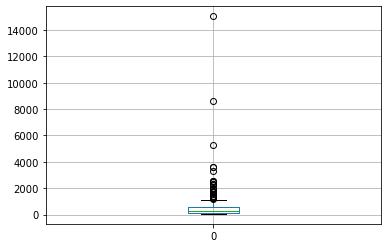

In [224]:
cnt_list = []
for key in stockNewsCount.keys():
    cnt_list.append(np.sum(list(stockNewsCount[key].values())))

cnt_list = pd.DataFrame(cnt_list)

cnt_list.boxplot()

In [223]:
cnt_list.describe()

,0
count,300.000000
mean,544.170000
std,1145.446034
min,48.000000
25%,144.750000
50%,260.500000
75%,542.750000
max,15046.000000


In [290]:
import pickle
with open('stockNewsCount.pickle', 'wb') as handle:
    pickle.dump(stockNewsCount, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('stockNewsCount.pickle', 'rb') as handle:
#     stockNewsCount = pickle.load(handle)

In [191]:
mappingPath = dataPath + '/stockid2name.xlsx'

id2name= pd.read_excel(mappingPath)

id2name.columns = ['id','name','money']
id2name = id2name.iloc[:300,:]
id2name['id'] = id2name['id'].apply(lambda x: (x[-2:]+x[:-3]).lower())

In [195]:
id2name.to_csv(dataPath + "/stockid2name.csv", index = False, sep = '\t')

# data loader
## Organize dataframe

## Pytorch dataloader

### Picklize stopwords

In [154]:
dataPath

'/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'

In [156]:
#Build stopwords dataset
Stopwords = set()
for i in os.walk(dataPath + '/Stopwords'):
    for file in i[2]:
        f_name = i[0]+'/'+file
        f = open(f_name)
        for word in f.readlines():
            Stopwords.add(word.strip('\n'))
        f.close()

In [159]:
import pickle
with open(dataPath + '/Stopwords/stopwords.pkl', 'wb') as handle:
    pickle.dump(Stopwords, handle)

### dataloader

In [3]:
import pickle
with open('stockNewsCount.pickle', 'rb') as handle:
    stockNewsCount = pickle.load(handle)

maximum news in one date for one stock

In [4]:
np.max([np.max(list(stockNewsCount[stock].values())) for stock in stockNewsCount.keys()])

NameError: name 'np' is not defined

In [23]:
import pickle, argparse, os, sys
from sklearn.metrics import accuracy_score
import numpy as np
import random
import torch
import torch.nn as nn
import torch.functional as F
import thulac # Chinese word splitting tool
import gensim
import pickle
import re
import pandas as pd
dataPath = '/Users/lvkunsheng/PycharmProjects/cs545Finals/stockDataFromTushare'
word2vecPath =  dataPath + '/ChineseWord2Vec/sgns.financial.word'
stopwordsPath = dataPath + '/Stopwords/stopwords.pkl'

class InputDataset(torch.utils.data.Dataset):
    def __init__(self, dataloaderFile, dataPath, word2vecPath, stopwordsPath, embedded_size, max_news_cnt):
        # read in the dataloader file and store it in class
        # make sure some rows that have no news at all are discarded 
        self.df_dataloader = pd.read_csv(dataloaderFile)
        self.embedded_size = embedded_size
        self.max_news_cnt  = max_news_cnt
        self.dataPath = dataPath # prefix of all the files
        self.thu1 = thulac.thulac(seg_only=True)   # filter out meaningless word
        self.word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vecPath, binary=False)
        with open(stopwordsPath, 'rb') as handle:
            self.stopwords = pickle.load(handle)

        
    def __getitem__(self, index):
        # read in one line of data
        # return x, y
        # [['今天', '股市', '又', '降', '了'], sentence2, ..., sentence10], label
        # [vector of corpus1, vector of corpus2, ..., vector of corpus10], label
        def clean_sentence(s, stopwords)->[str]:
            text_split = self.thu1.cut(s, text=True)
            w_l = []
            for word in text_split:
                if word not in stopwords:
                    w_l.append(word)
            return w_l
        
        def clean_file(f_name,stopwords)->[str]:
            f = open(f_name)
            txt = f.read()
            txt = re.sub(r'(\(image_address="https|image_address="http)?:\/\/(\w|\.|\/|\?|\=|\&|\%\\)*\b', '', txt)
            txt = re.sub(r'\\u[a-zA-Z0-9]*\b', '', txt)
            txt = txt.strip().rstrip()
            tl = txt.split('\n')
            f.close()
            s_l = []
            for t in tl:
                s_l.append(clean_sentence(t,stopwords))
            return s_l
        
        def vectorize_s(s:[str],model)->'vec':
            ct = 0
            vec = np.zeros((self.embedded_size,))
            for word in s:
                if word in model.vocab:
                    ct+=1
                    vec+=model.get_vector(word)
            if ct!=0:
                vec=vec/ct
            return vec

        def vectorize_sl(s_l:[[str]],model)->'vec':
            v_l = []
            for s in s_l:
                vec  = vectorize_s(s,model)
                if vec[0]!= np.nan:
                    v_l.append(vec)
            # pad with 0s
            v_l.extend([[0]*self.embedded_size]*(self.max_news_cnt-len(v_l)))
            return v_l    
        
        row = self.df_dataloader.iloc[index, :]
        corpus = []
        for i in range(2, 12): # for each date
            if pd.isna(row[i]): # no news on this date
                # Pads with all 0
                corpus.append([[0]*self.embedded_size]*self.max_news_cnt)
            else:
                sentence = clean_file(self.dataPath + '/' + row[i],
                                      self.stopwords)
                
                corpus.append(vectorize_sl(sentence,self.word2vec))
                
        return np.array(corpus), row[-1]
    def __len__(self):
        return self.df_dataloader.shape[0]
    


In [ ]:
input_data = InputDataset('/Users/lvkunsheng/Documents/545Final/2020WN_CS545/dataloader/train_data.csv',
                          dataPath,
                          word2vecPath,
                          stopwordsPath,
                          embedded_size = 300,
                          max_news_cnt = 127)

Model loaded succeed


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=input_data,
                                           batch_size=5, 
                                           shuffle=False)

In [ ]:
for i, (X, label) in enumerate(train_loader):
    break

torch.Size([5, 10, 127, 300])

In [283]:
X[0][0]

tensor([[-2.8448e-02, -1.1963e-01, -1.3990e-02, -1.9732e-01, -1.8523e-01,
         -1.0524e-01, -1.2367e-01, -8.9036e-03, -3.7005e-02, -3.5906e-01,
          1.5798e-01,  9.9811e-02, -2.5020e-02, -2.1728e-02,  1.3908e-01,
          9.8904e-02,  4.9476e-03, -1.3831e-01,  2.1854e-02, -8.2262e-02,
         -4.2724e-02, -9.5432e-02, -1.2684e-01,  4.7518e-02, -4.2635e-02,
          1.6562e-01,  1.8947e-02, -5.7966e-02,  3.1484e-02, -7.1907e-02,
         -1.2553e-01,  1.3341e-01,  2.3178e-01, -1.9808e-01, -9.0270e-02,
          3.9234e-02,  7.1492e-02, -6.3648e-02,  7.1387e-02,  3.6175e-02,
          4.4977e-02,  8.7373e-02,  4.5670e-02,  1.3195e-03,  5.4602e-02,
          6.8305e-02, -6.2512e-02, -1.2364e-02, -1.5406e-01, -3.9989e-02,
          2.2388e-02, -3.0614e-02, -1.3233e-02,  7.6416e-02, -4.3634e-02,
          2.0708e-01,  6.7834e-02, -2.0778e-01,  8.2068e-02, -1.3548e-01,
          1.0311e-01,  2.0563e-01,  1.1959e-01, -8.1950e-02,  2.4201e-01,
          5.1315e-02, -1.9106e-01, -1.

In [11]:
def clean_sentence(s,stopwords)->[str]:
    text_split = thu1.cut(s, text=True)
    w_l = []
    for word in text_split:
        if word not in stopwords:
            w_l.append(word)
    return w_l

def clean_file(f_name,stopwords)->[str]:
    f = open(f_name)
    txt = f.read()
    txt = re.sub(r'(\(image_address="https|image_address="http)?:\/\/(\w|\.|\/|\?|\=|\&|\%\\)*\b', '', txt)
    txt = re.sub(r'\\u[a-zA-Z0-9]*\b', '', txt)
    txt = txt.strip().rstrip()
    tl = txt.split('\n')
    f.close()
    s_l = []
    for t in tl:
        s_l.append(clean_sentence(t,stopwords))

    return s_l
def vectorize_s(s:[str],model)->'vec':
    ct = 0
    vec = np.zeros((300,))
    for word in s:
        if word in model.vocab:
            ct+=1
            vec+=model.get_vector(word)
    if ct!=0:
        vec=vec/ct
    return vec

def vectorize_sl(s_l:[[str]],model)->'vec':
    v_l = []
    for s in s_l:
        vec  = vectorize_s(s,model)
        if vec[0]!= np.nan:
            v_l.append(vec)
    # pad with 0s
    v_l.extend([[0]*embedded_size]*(max_news_cnt-len(v_l)))
    return v_l    


with open(stopwordsPath, 'rb') as handle:
    stopwords = pickle.load(handle)
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vecPath, binary=False)
index = 0
embedded_size = 300
max_news_cnt = 127
row = df_dataloader.iloc[index, :]
corpus = []
for i in range(1, row.shape[0] - 2): # for each date
    if pd.isna(row[i]): # no news on this date
        # Pads with all 0
        corpus.append([[0]*embedded_size]*max_news_cnt)
    else:
        sentence = clean_file(dataPath + '/' + row[i],
                              stopwords)

        corpus.append(vectorize_sl(sentence,word2vec))   


NameError: name 'df_dataloader' is not defined

In [ ]:

index = 0
embedded_size = 300
max_news_cnt = 127
row = df_dataloader.iloc[index, :]
corpus = []
for i in range(2, 12): # for each date
    if pd.isna(row[i]): # no news on this date
        # Pads with all 0
        corpus.append([[0]*embedded_size]*max_news_cnt)
    else:
        sentence = clean_file(dataPath + '/' + row[i],
                              stopwords)

        corpus.append(vectorize_sl(sentence,word2vec))

In [273]:
np.array(corpus).shape

(10, 127, 300)

In [274]:
t = torch.from_numpy(np.array(corpus))

In [275]:
t.shape

torch.Size([10, 127, 300])

In [284]:
t1 = t

In [287]:
t3 = torch.stack((t,t1))

In [288]:
t3.shape

torch.Size([2, 10, 127, 300])

ERROR: unknown command "upgrate"


In [301]:
torch.cat((t3,t1))

RuntimeError: Tensors must have same number of dimensions: got 4 and 3

In [199]:
len(corpus)

10

In [201]:
list(map(len, corpus))

[3, 3, 1, 3, 4, 3, 1, 2, 0, 0]

In [203]:
len(corpus[0][0])

300

In [200]:
corpus

[[array([-2.84481495e-02, -1.19630817e-01, -1.39903431e-02, -1.97315806e-01,
         -1.85234989e-01, -1.05237935e-01, -1.23673316e-01, -8.90356785e-03,
         -3.70051124e-02, -3.59059515e-01,  1.57978735e-01,  9.98114072e-02,
         -2.50201012e-02, -2.17284954e-02,  1.39076087e-01,  9.89037667e-02,
          4.94763588e-03, -1.38308186e-01,  2.18536380e-02, -8.22620923e-02,
         -4.27238383e-02, -9.54322560e-02, -1.26839730e-01,  4.75176809e-02,
         -4.26346929e-02,  1.65623764e-01,  1.89468238e-02, -5.79663198e-02,
          3.14835491e-02, -7.19070207e-02, -1.25525844e-01,  1.33406880e-01,
          2.31781871e-01, -1.98078549e-01, -9.02704903e-02,  3.92344175e-02,
          7.14924054e-02, -6.36475208e-02,  7.13871730e-02,  3.61748393e-02,
          4.49771783e-02,  8.73728174e-02,  4.56697468e-02,  1.31952916e-03,
          5.46021749e-02,  6.83048752e-02, -6.25120585e-02, -1.23642532e-02,
         -1.54063179e-01, -3.99887320e-02,  2.23876544e-02, -3.06140823e-02,

# Model

Chinese split word tools

In [291]:
!pip install thulac

     |████████████████████████████████| 52.9 MB 1.5 MB/s eta 0:00:01
  Created wheel for thulac: filename=thulac-0.2.1-py3-none-any.whl size=53141672 sha256=1068666df4f58b1567135add9af98fb40ea662b4e1ca79e15fdd68986b923bed
  Stored in directory: /Users/lvkunsheng/Library/Caches/pip/wheels/97/37/f3/be4ae10faf0fbf35cc192469b737ead6f8f99404bcd82fb2e0
Successfully built thulac


[GRU](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html#torch.nn.GRU)

\begin{array}{l}
\mathrm{r}_{\mathrm{t}}=\sigma\left(\mathrm{W}_{\mathrm{ir}} \mathrm{x}_{\mathrm{t}}+\mathrm{b}_{\mathrm{ir}}+\mathrm{W}_{\mathrm{hr}} \mathrm{h}_{(\mathrm{t}-1)}+\mathrm{b}_{\mathrm{hr}}\right) \\
\mathrm{z}_{\mathrm{t}}=\sigma\left(\mathrm{W}_{\mathrm{iz}} \mathrm{x}_{\mathrm{t}}+\mathrm{b}_{\mathrm{iz}}+\mathrm{W}_{\mathrm{hz}} \mathrm{h}_{(\mathrm{t}-1)}+\mathrm{b}_{\mathrm{hz}}\right) \\
\mathrm{n}_{\mathrm{t}}=\tanh \left(\mathrm{W}_{\mathrm{in}} \mathrm{x}_{\mathrm{t}}+\mathrm{b}_{\mathrm{in}}+\mathrm{r}_{\mathrm{t}} *\left(\mathrm{W}_{\mathrm{hn}} \mathrm{h}_{(\mathrm{t}-1)}+\mathrm{b}_{\mathrm{hn}}\right)\right) \\
\mathrm{h}_{\mathrm{t}}=\left(1-\mathrm{z}_{\mathrm{t}}\right) * \mathrm{n}_{\mathrm{t}}+\mathrm{z}_{\mathrm{t}} * \mathrm{h}_{(\mathrm{t}-1)}
\end{array}

![GRU](https://cdn-images-1.medium.com/freeze/max/1000/1*-WbXpMDWCpqu7M3ibzFedg.png?q=20)

In [ ]:
class baseLineRnnModel(nn.Module):
    def __init__(self, embedded_size, hidden_size, num_layers, num_classes):
        super(baseLineRnnModel, self).__init__()
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.embedded_size = embedded_size
        
        ################
        # news attention
        ################
        self.Wn = torch.tensor((1,self.embedded_size), requires_grad = True) # 1*300
        ################
        
        ################
        # GRU
        ################
        self.gru = nn.GRU(input_size=embedded_size,  # The number of expected features in the input x, which is embedded size 
                          hidden_size=hidden_size, # The number of features in the hidden state h, which is the output dim
                          num_layers=1,  # Number of recurrent layers
                          batch_first=True, # (batch, seq, feature)
                          bidirectional=True, # bidirectional GRU, concatenate two directions
                          dropout=0.3) # dropout
        ################
        
    def forward(self, X):
        # 10 * 300 * Lt * batch_size 
        # nt: Lt * batch_size * embedded_size
        
        ################
        # news attention
        ################
        Ut = nn.Sigmoid(self.Wn * nt)
        at = nn.Softmax(Ut)
        dt = nt * at # 300*1
        ################
        
        ################
        # GRU
        ################
        
        
        ################
        loss = None
        return loss